<b>Задание</b>
1. Восстановите пропуски в столбце kitchen_area. 
2. Добавьте информацию из датасета region.csv.
3. Исследуйте рынок недвижимости в РФ за представленный период. Величина исследования - цена за м2.
4. Определите от каких признаков зависит стоимость объекта недвижимости. Найдите скрытые закономерности.
5. Когда выгодно покупать/продавать объект недвижимости?
6. Создайте модель прогноза цены объекта недвижимости.


In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV

In [33]:
df = pd.read_csv('realty_18_21.csv')
df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,2021-05-01,3,1,8,17,4,93.2,13.8,11
5477002,12503160,2021-05-01,3,2,17,32,2,45.9,6.6,11
5477003,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1
5477004,11831910,2021-05-01,3,1,8,33,2,52.1,18.9,11


In [34]:
reg = pd.read_csv('region.csv')
reg

,code,reg_name
0,2661,Санкт-Петербург
1,3446,Ленинградская область
2,3,Москва
3,81,Московская область
4,2843,Краснодарский край
...,...,...
78,16705,Магаданская область
79,69,Еврейская автономная область
80,4963,Приморский край
81,1901,Сахалинская область


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   region         int64  
 3   building_type  int64  
 4   level          int64  
 5   levels         int64  
 6   rooms          int64  
 7   area           float64
 8   kitchen_area   float64
 9   object_type    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 417.9+ MB


In [36]:
reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   code      83 non-null     object
 1   reg_name  83 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [37]:
reg[reg['code'] == '7873, 6937']
# у региона республика Крым два кода, которые разделены запятой

,code,reg_name
36,"7873, 6937",Республика Крым


In [38]:
# разделим строку на 2
reg['code'] = reg['code'].str.split(',')
reg = reg.explode('code')

In [39]:
reg['code'] = pd.to_numeric(reg['code'])

In [40]:
reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 82
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   code      84 non-null     int64 
 1   reg_name  84 non-null     object
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [41]:
df.isna().sum()

price                 0
date                  0
region                0
building_type         0
level                 0
levels                0
rooms                 0
area                  0
kitchen_area     253711
object_type           0
dtype: int64

In [42]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   price          int64         
 1   date           datetime64[ns]
 2   region         int64         
 3   building_type  int64         
 4   level          int64         
 5   levels         int64         
 6   rooms          int64         
 7   area           float64       
 8   kitchen_area   float64       
 9   object_type    int64         
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 417.9 MB


In [43]:
df['year'] = df['date'].dt.year
df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2018
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1,2018
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,2018
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,11,2018
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1,2018
...,...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,2021-05-01,3,1,8,17,4,93.2,13.8,11,2021
5477002,12503160,2021-05-01,3,2,17,32,2,45.9,6.6,11,2021
5477003,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1,2021
5477004,11831910,2021-05-01,3,1,8,33,2,52.1,18.9,11,2021


In [44]:
df['object_type'].unique()

array([ 1, 11], dtype=int64)

In [45]:
# 1 - вторичный рынок, 0 - новостройка
df['object_type'] = df['object_type'].replace([11], 0)
df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2018
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1,2018
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,2018
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,0,2018
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1,2018
...,...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,2021-05-01,3,1,8,17,4,93.2,13.8,0,2021
5477002,12503160,2021-05-01,3,2,17,32,2,45.9,6.6,0,2021
5477003,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1,2021
5477004,11831910,2021-05-01,3,1,8,33,2,52.1,18.9,0,2021


### Заполнение пропусков

В столбце kitchen_area есть пропуски. Я бы заполнила их медианным значением, но так нельзя. Поэтому будем придумывать другой способ. Можно использовать соотношение площади кухни к общей площади квартиры по разным группам квартир. Для этого напием функцию, которая будет искать доли площади у каждого наблюдения в группе, затем находит среднюю долю в каждой группе и каждой кухне с пропущенным значением площади присваивает значение площади в соответствии с общей площадью квартиры и полученным коэффициентом

In [46]:
def missing_value(group):
    group['share_kit_area'] = group['kitchen_area'] / group['area']
    avg = group['share_kit_area'].mean()
    group['kitchen_area'] = group['kitchen_area'].fillna(group['area'] * avg)
    return group

In [47]:
df = df.groupby(['building_type', 'level', 'rooms']).apply(missing_value)

In [48]:
df.drop(['share_kit_area'], axis=1, inplace=True) #удаляем ненужные столбцы

После применения данной функции у нас осталось 4 пропущенных значения. Скорее всего они не заполнились так как не принадлежат ни к одной группе

In [49]:
# поиск строк с пропущенными значениями
missing_values = df[df.isnull().any(axis=1)]
print(missing_values)

            price       date  region  building_type  level  levels  rooms  \
808504   29300000 2018-12-24    2661              3     10      12      8   
1347631  37800000 2019-03-12    2661              3     27      27      9   
2706394   6558990 2019-10-07    6171              1     28      32      4   
5043007  28000000 2021-02-18       3              4     25      39      4   

          area  kitchen_area  object_type  year  
808504   265.0           NaN            1  2018  
1347631  331.0           NaN            1  2019  
2706394   93.3           NaN            0  2019  
5043007  190.0           NaN            0  2021  


После просмотра пропущенных значений так и осталось непонятным что их объединяет, поэтому удалим их

In [50]:
df.drop(labels=[808504, 1347631, 2706394, 5043007], axis=0, inplace=True)

In [52]:
df.isna().sum()

price            0
date             0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
year             0
dtype: int64

Добавим в датасет данные из датасета о регионах с помощью функции merge()

In [53]:
reg = reg.rename(columns = {'code':'region'})
reg

,region,reg_name
0,2661,Санкт-Петербург
1,3446,Ленинградская область
2,3,Москва
3,81,Московская область
4,2843,Краснодарский край
...,...,...
78,16705,Магаданская область
79,69,Еврейская автономная область
80,4963,Приморский край
81,1901,Сахалинская область


In [54]:
df_new = pd.merge(df, reg, on='region')
df_new

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,reg_name
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2018,Санкт-Петербург
1,3600000,2018-03-04,2661,1,2,5,1,31.1,6.0,1,2018,Санкт-Петербург
2,3200000,2018-04-10,2661,1,7,9,1,31.0,7.0,1,2018,Санкт-Петербург
3,6500000,2018-04-23,2661,3,3,3,3,89.0,10.0,1,2018,Санкт-Петербург
4,6300000,2018-04-28,2661,3,5,5,2,99.9,14.5,1,2018,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...
5476997,3000000,2018-11-29,61888,5,2,2,2,57.0,10.0,1,2018,Ненецкий автономный округ
5476998,1400000,2018-11-29,61888,3,3,3,1,18.6,4.0,1,2018,Ненецкий автономный округ
5476999,6000000,2018-11-30,61888,3,5,5,2,64.3,16.3,1,2018,Ненецкий автономный округ
5477000,3500000,2018-11-30,61888,2,1,3,2,59.7,10.2,1,2018,Ненецкий автономный округ


## Рынок недвижимости РФ

<AxesSubplot:>

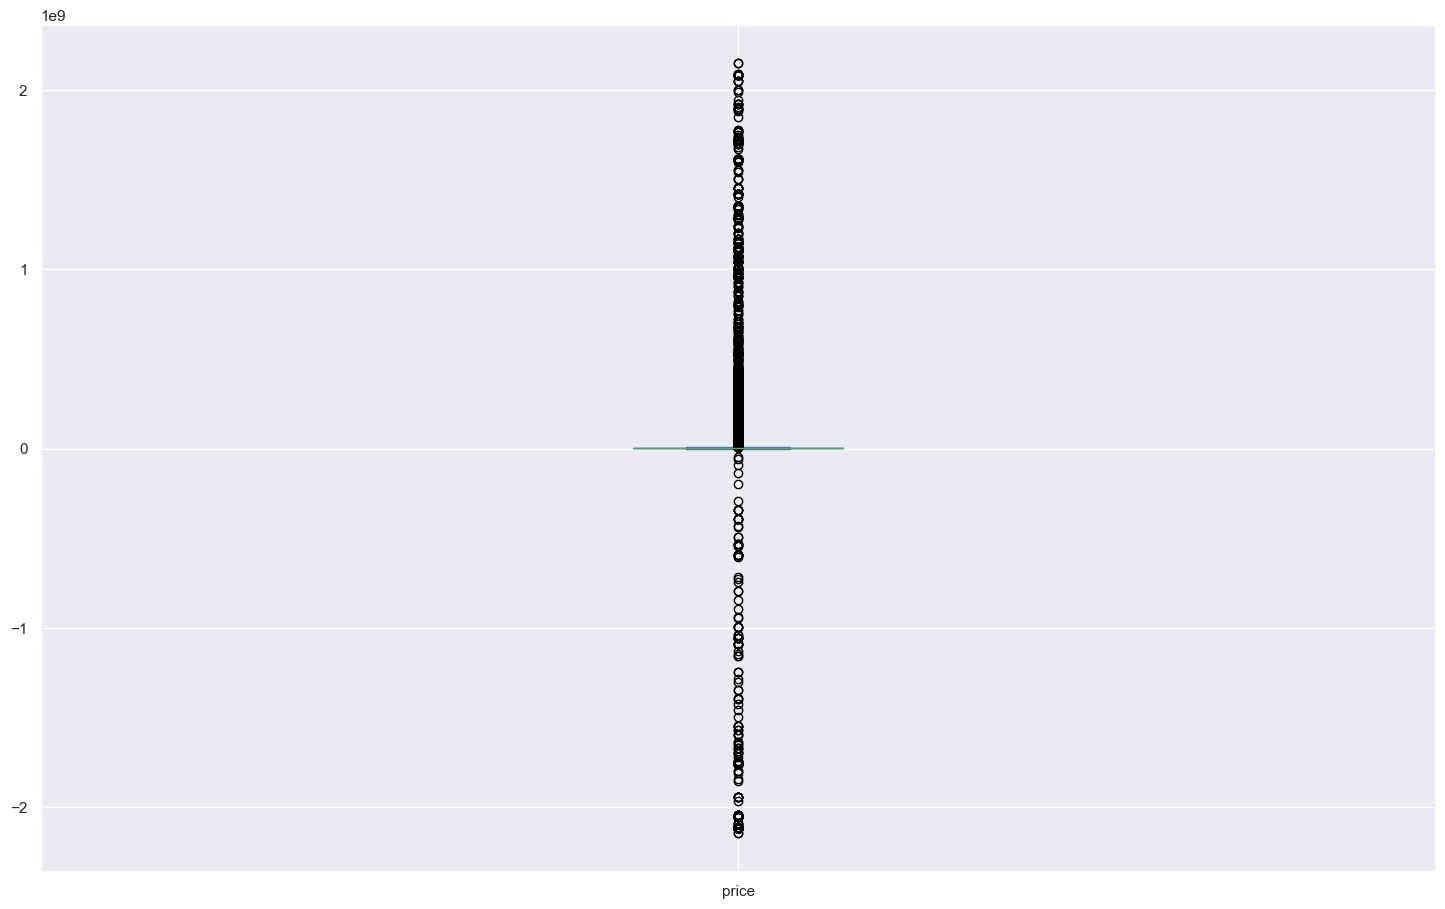

In [58]:
df['price'].plot(kind='box')

In [59]:
q75 = np.percentile(df['price'], 75)
q25 = np.percentile(df['price'], 25)
iqr = (q75 - q25)
ejection_h = q75 + iqr * 1.5
ejection_l = q25 - iqr * 1.5

print (ejection_l, ejection_h)

-2328000.0 9080000.0


<AxesSubplot:>

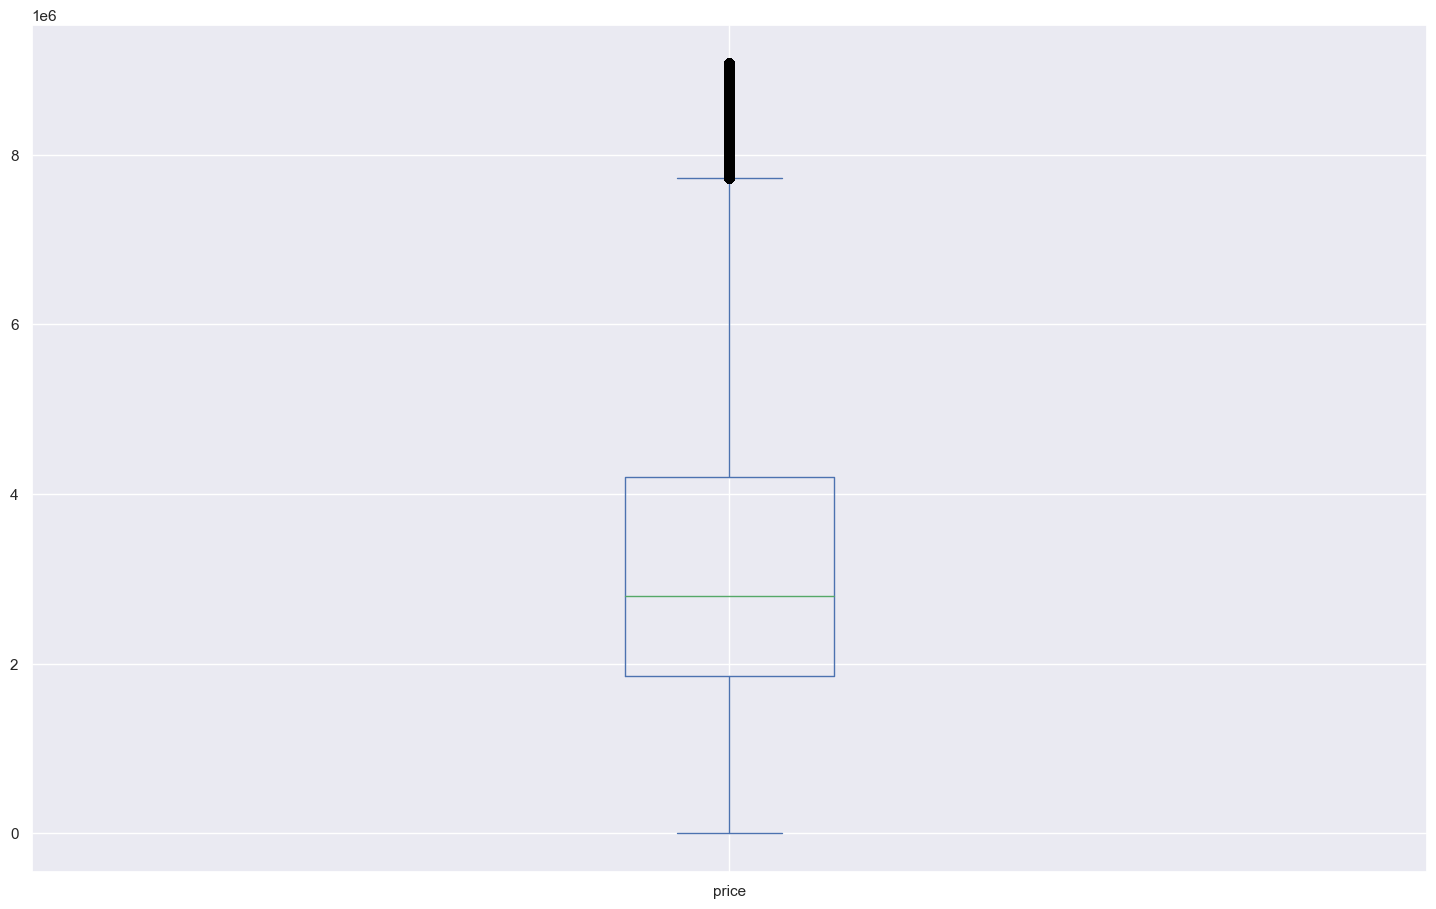

In [60]:
df = df[(df['price'] > ejection_l) & (df['price'] <= ejection_h)]
df = df.reset_index(drop=True)
df['price'].plot(kind='box')

In [61]:
# добавим столбец с ценой за м2
df_new['price_met'] = df_new['price'] / df_new['area']
df_new

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,reg_name,price_met
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2018,Санкт-Петербург,73244.552058
1,3600000,2018-03-04,2661,1,2,5,1,31.1,6.0,1,2018,Санкт-Петербург,115755.627010
2,3200000,2018-04-10,2661,1,7,9,1,31.0,7.0,1,2018,Санкт-Петербург,103225.806452
3,6500000,2018-04-23,2661,3,3,3,3,89.0,10.0,1,2018,Санкт-Петербург,73033.707865
4,6300000,2018-04-28,2661,3,5,5,2,99.9,14.5,1,2018,Санкт-Петербург,63063.063063
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476997,3000000,2018-11-29,61888,5,2,2,2,57.0,10.0,1,2018,Ненецкий автономный округ,52631.578947
5476998,1400000,2018-11-29,61888,3,3,3,1,18.6,4.0,1,2018,Ненецкий автономный округ,75268.817204
5476999,6000000,2018-11-30,61888,3,5,5,2,64.3,16.3,1,2018,Ненецкий автономный округ,93312.597201
5477000,3500000,2018-11-30,61888,2,1,3,2,59.7,10.2,1,2018,Ненецкий автономный округ,58626.465662


Text(0.5, 1.0, 'График динамики цены')

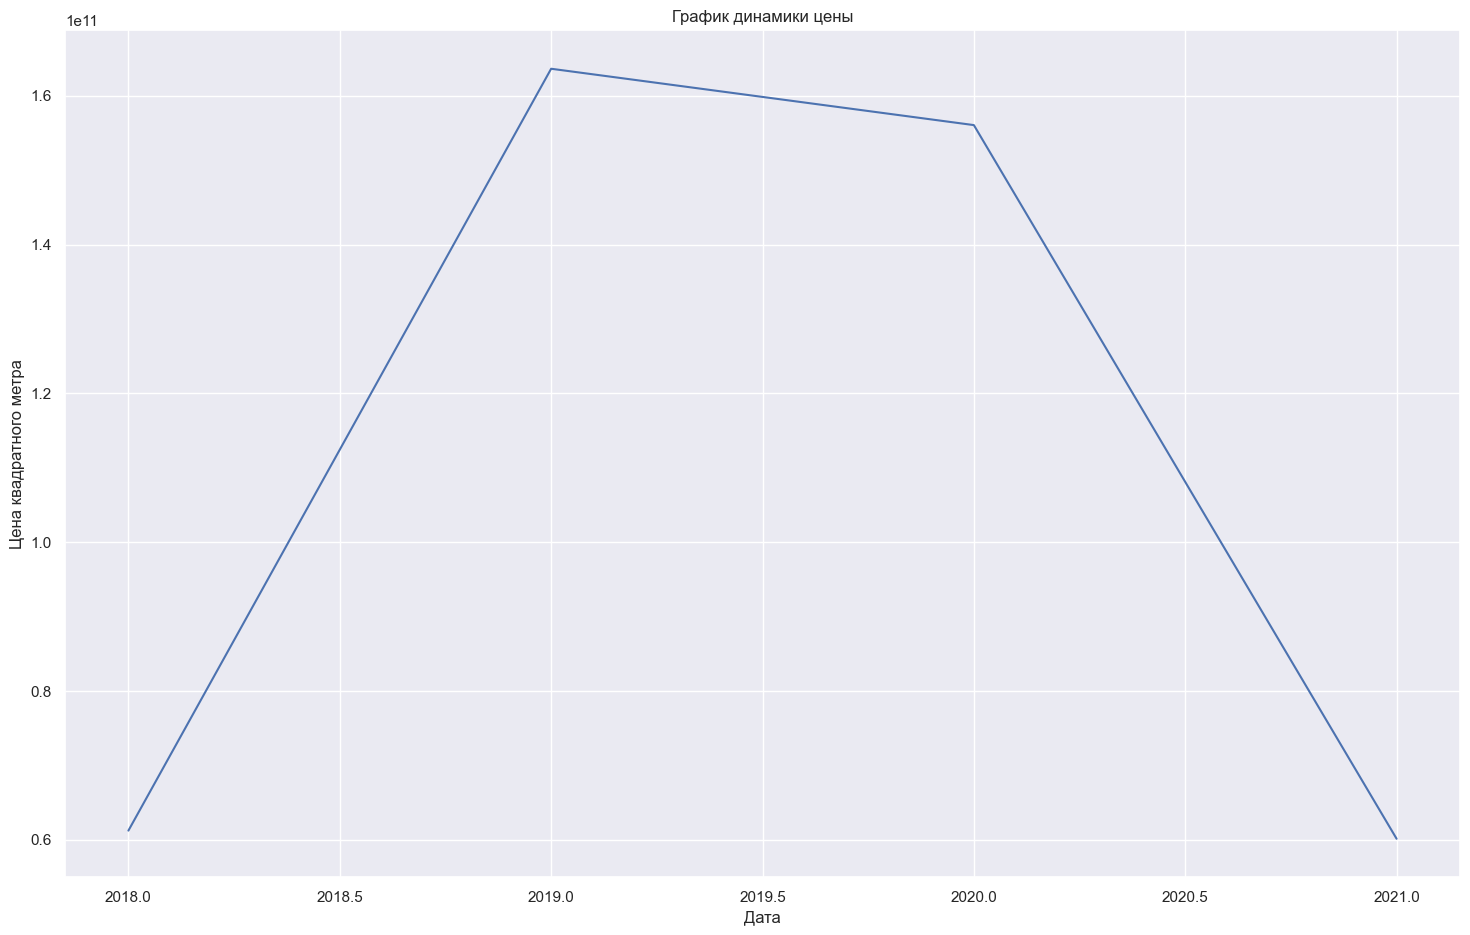

In [62]:
#Посмотрим общую динамику цен за квадратный метр по годам
sns.set(rc={"figure.figsize":(18, 11)})
sns.lineplot(data=df_new, x='year', y='price_met', ci=None, estimator='sum')
plt.xlabel('Дата')
plt.ylabel('Цена квадратного метра')
plt.title('График динамики цены')

Text(0.5, 1.0, 'График динамики цены на квадратный метр по первичному и вторичному рынку')

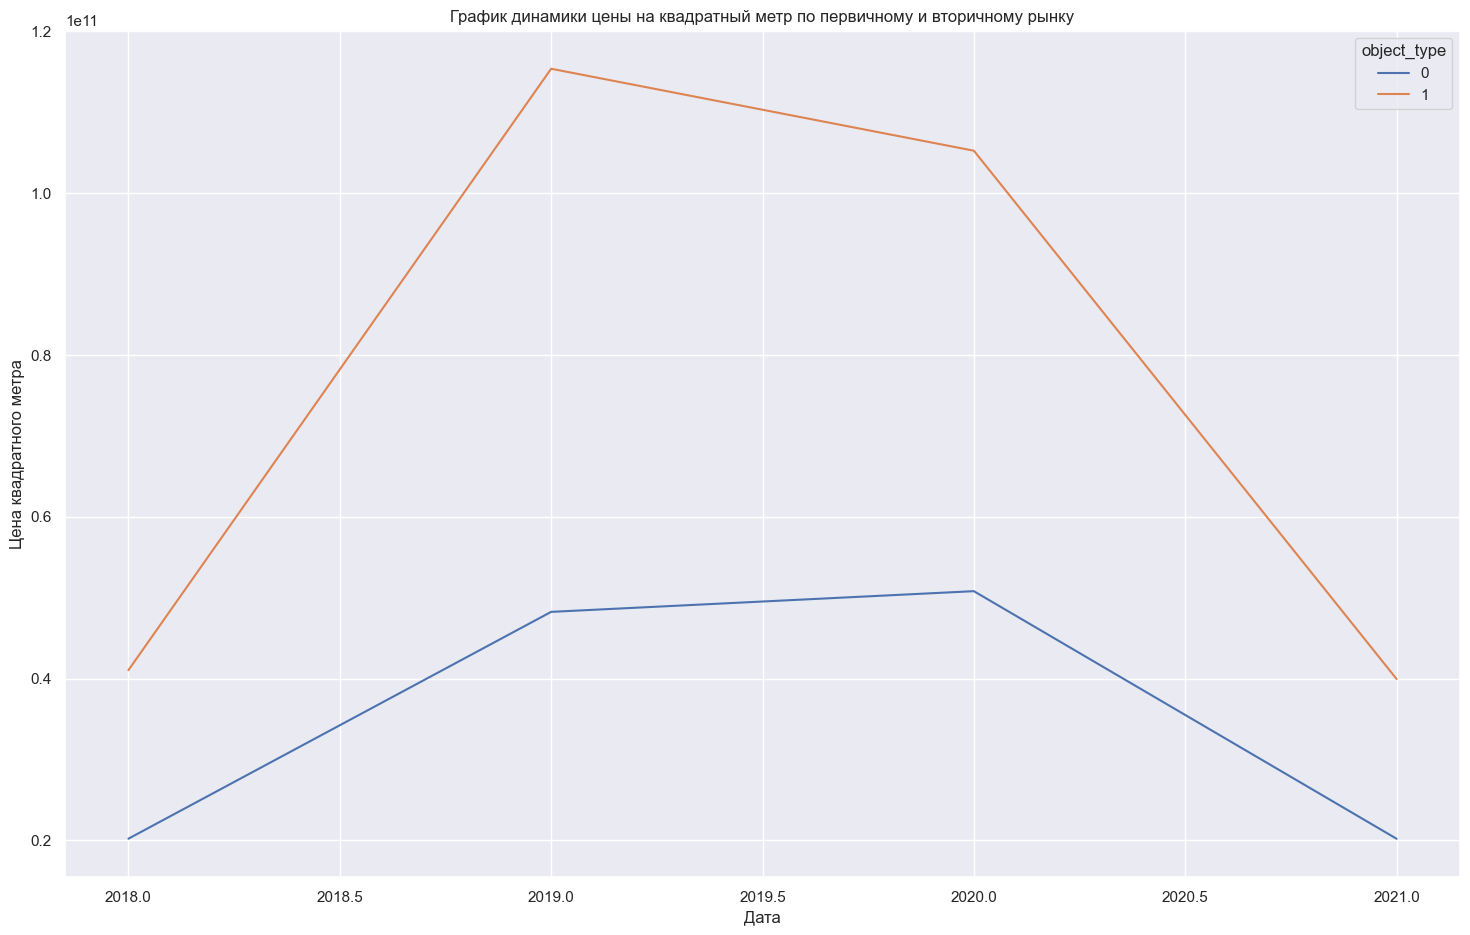

In [63]:
#Посмотрим на динамику цен с детализацией по рынку 
sns.set(rc={"figure.figsize":(18, 11)})
sns.lineplot(data=df_new, x='year', y='price_met', ci=None, estimator='sum', hue='object_type')
plt.xlabel('Дата')
plt.ylabel('Цена квадратного метра')
plt.title('График динамики цены на квадратный метр по первичному и вторичному рынку')

Посмотрим на барплоты

In [65]:
reg = pd.pivot_table(data=df_new, index='reg_name', values='price_met', aggfunc='median').reset_index()
reg

,reg_name,price_met
0,Алтайский край,44404.992674
1,Амурская область,85595.271778
2,Архангельская область,74489.795918
3,Астраханская область,43750.000000
4,Белгородская область,54929.577465
...,...,...
78,Челябинская область,37288.135593
79,Чеченская Республика,40868.631866
80,Чувашская Республика,43181.818182
81,Ямало-Ненецкий автономный округ,68571.428571


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Москва'),
  Text(1, 0, 'Санкт-Петербург'),
  Text(2, 0, 'Московская область'),
  Text(3, 0, 'Амурская область'),
  Text(4, 0, 'Ленинградская область'),
  Text(5, 0, 'Республика Крым'),
  Text(6, 0, 'Архангельская область'),
  Text(7, 0, 'Ханты-Мансийский автономный округ'),
  Text(8, 0, 'Ненецкий автономный округ'),
  Text(9, 0, 'Хабаровский край')])

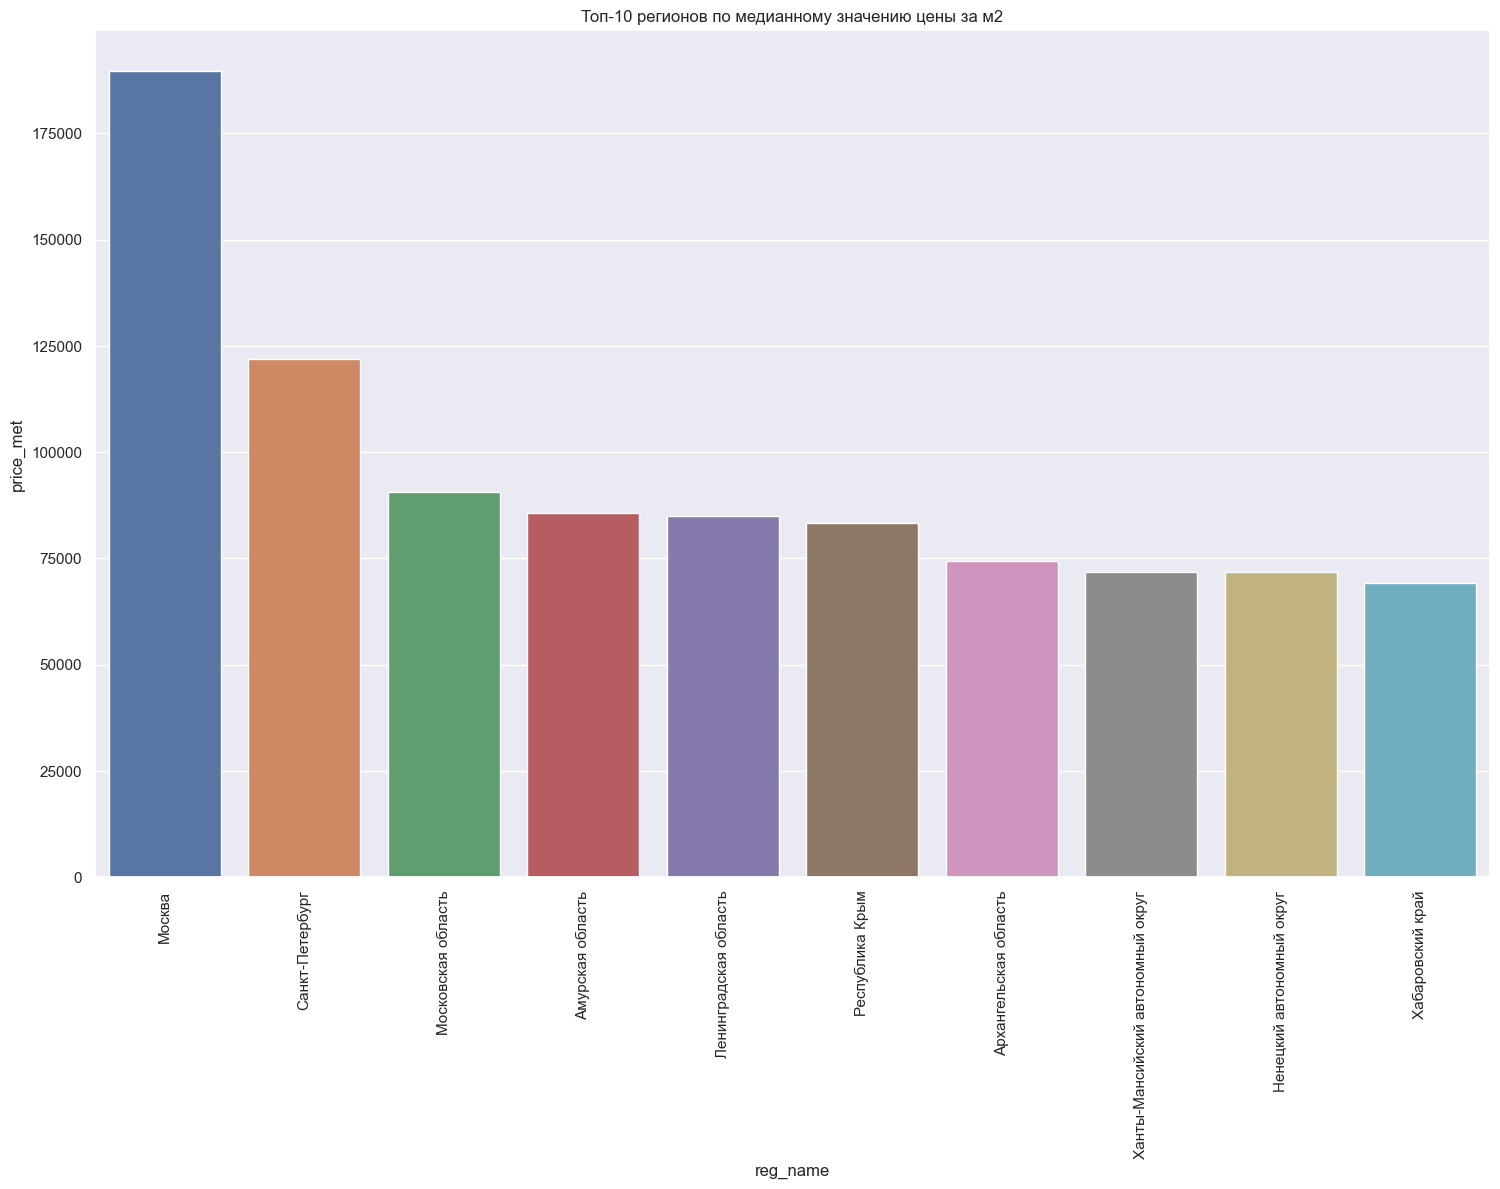

In [68]:
#посмотрим на топ-10 регионов
reg = reg.sort_values(by='price_met', ascending=False)
sns.barplot(data=reg.head(10), x='reg_name', y='price_met').set(title='Топ-10 регионов по медианному значению цены за м2')
plt.xticks(rotation=90)

Посмотрим на распределение цены по регионам за последние 2 года

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Москва'),
  Text(1, 0, 'Сахалинская область'),
  Text(2, 0, 'Санкт-Петербург'),
  Text(3, 0, 'Московская область'),
  Text(4, 0, 'Ленинградская область'),
  Text(5, 0, 'Амурская область'),
  Text(6, 0, 'Республика Крым'),
  Text(7, 0, 'Приморский край'),
  Text(8, 0, 'Архангельская область'),
  Text(9, 0, 'Республика Тыва')])

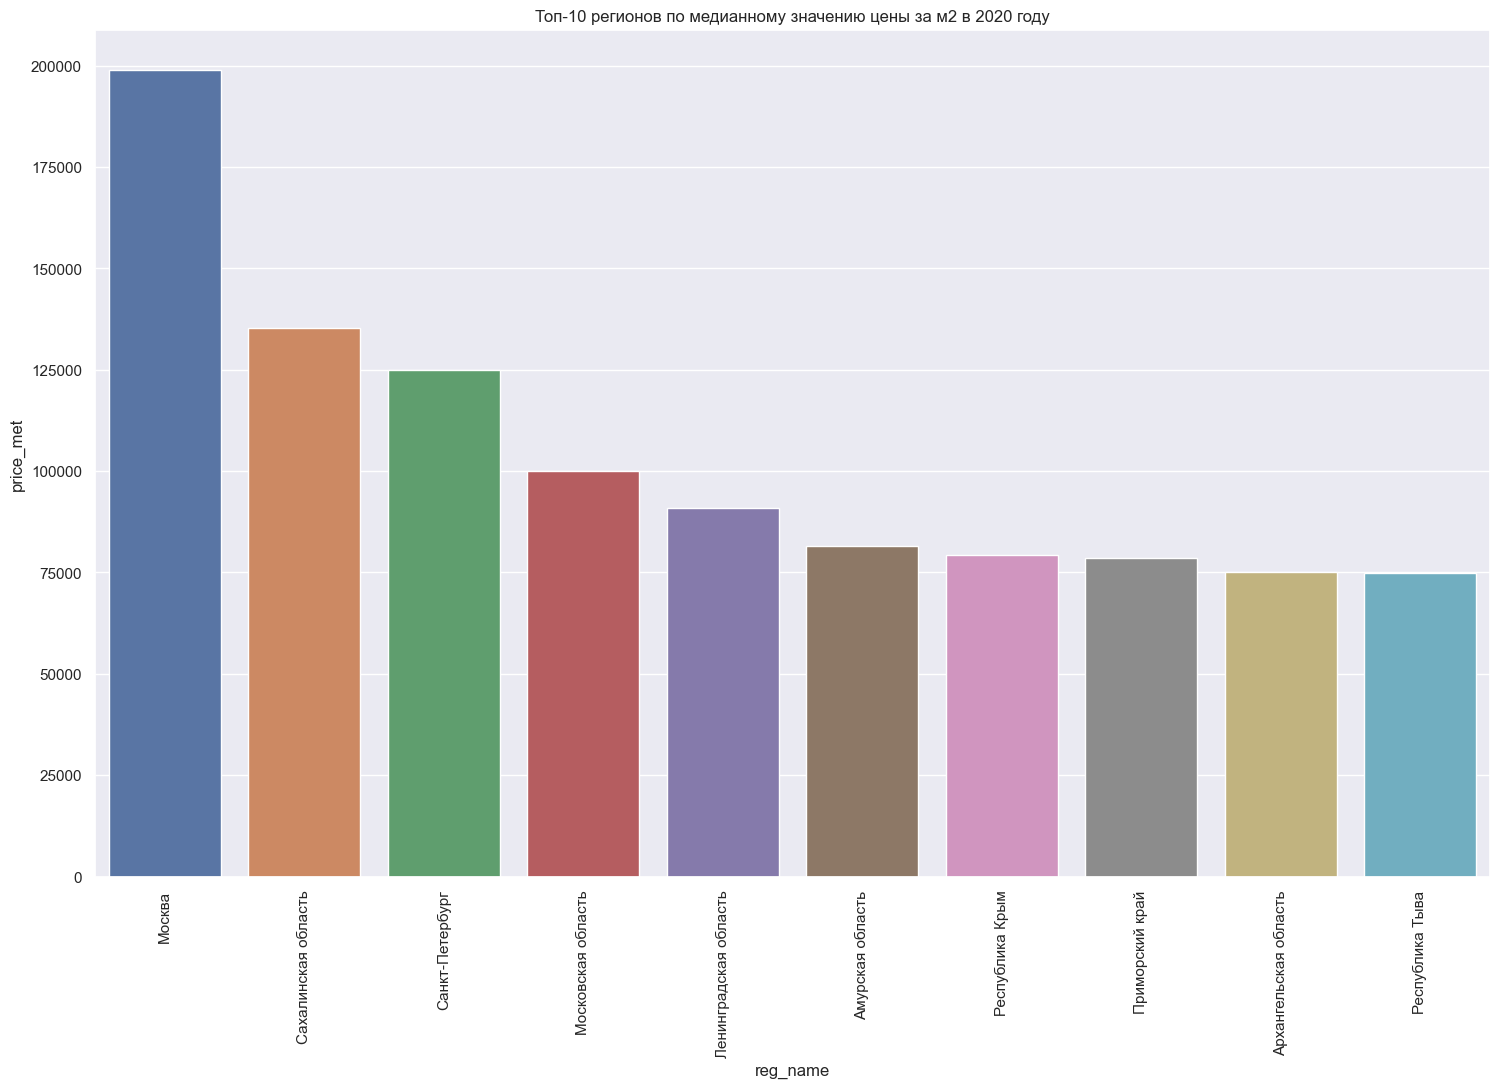

In [73]:
reg_2020 = pd.pivot_table(data=df_new[df_new['year'] == 2020], index='reg_name', values='price_met', aggfunc='median').reset_index().sort_values(by='price_met', ascending=False)
sns.barplot(data=reg_2020.head(10), x='reg_name', y='price_met').set(title='Топ-10 регионов по медианному значению цены за м2 в 2020 году')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Москва'),
  Text(1, 0, 'Санкт-Петербург'),
  Text(2, 0, 'Московская область'),
  Text(3, 0, 'Ямало-Ненецкий автономный округ'),
  Text(4, 0, 'Ленинградская область'),
  Text(5, 0, 'Амурская область'),
  Text(6, 0, 'Республика Тыва'),
  Text(7, 0, 'Республика Крым'),
  Text(8, 0, 'Калининградская область'),
  Text(9, 0, 'Нижегородская область')])

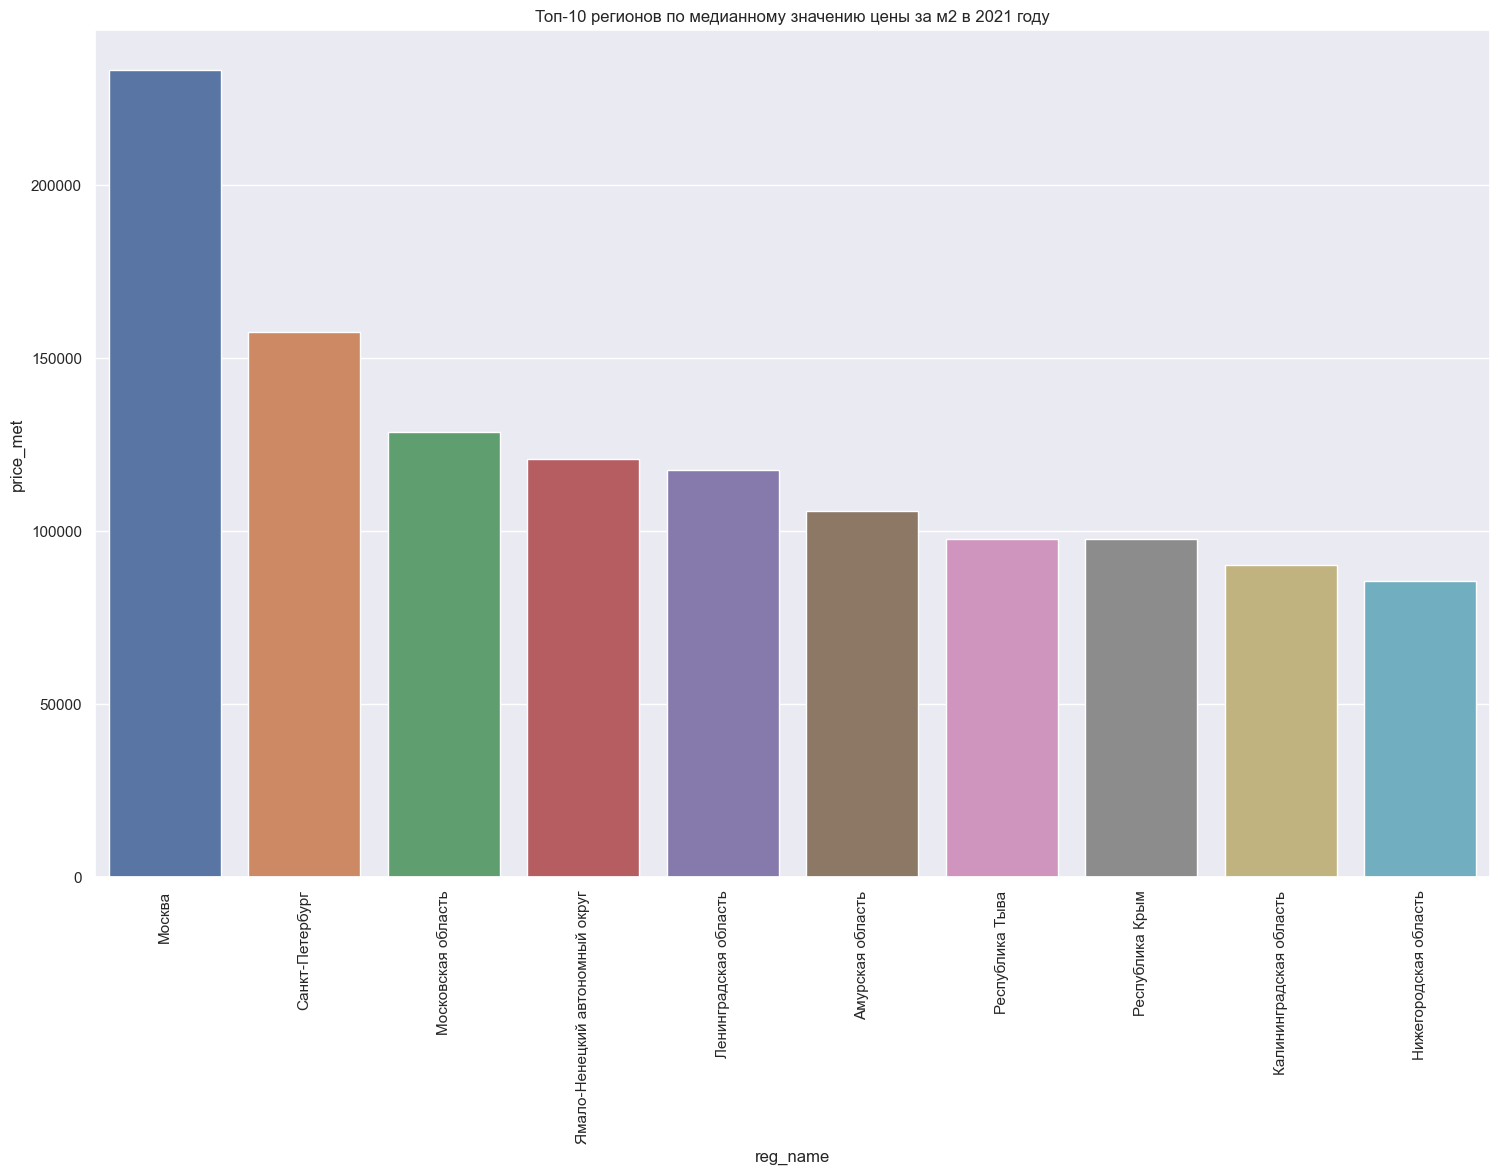

In [75]:
reg_2021 = pd.pivot_table(data=df_new[df_new['year'] == 2021], index='reg_name', values='price_met', aggfunc='median').reset_index().sort_values(by='price_met', ascending=False)
sns.barplot(data=reg_2021.head(10), x='reg_name', y='price_met').set(title='Топ-10 регионов по медианному значению цены за м2 в 2021 году')
plt.xticks(rotation=90)

Мы видим, что в общем и по годам Москва всегда оставалась на 1 месте по цене, а в Питере цены значительно вырасли в 2021 году 

Также мы можем посмотреть как меняется стоимость квадратного метра в зависимости от этажа 

[Text(0.5, 1.0, 'Цена за м кв в зависимости от этажа квартиры'),
 Text(0.5, 0, 'Этаж'),
 Text(0, 0.5, 'Медианное значение цены')]

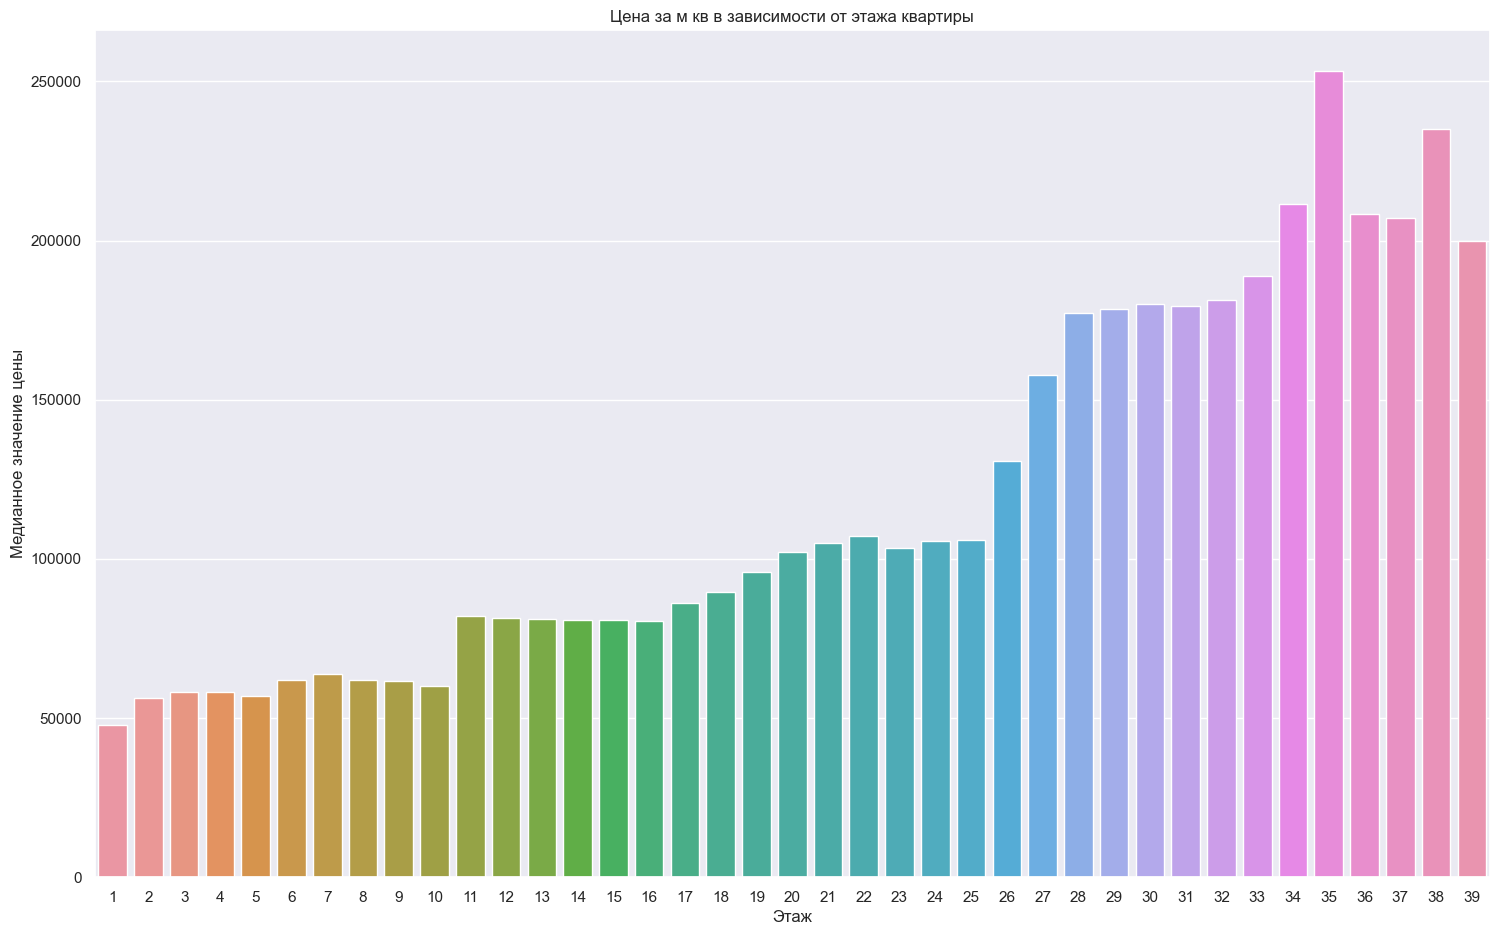

In [76]:
level = pd.pivot_table(data = df_new, index='level', values='price_met', aggfunc='median').reset_index()
sns.barplot(data=level, x='level', y='price_met').set(title='Цена за м кв в зависимости от этажа квартиры', xlabel='Этаж', ylabel='Медианное значение цены')

На графике видно, что в общем чем выше этаж, тем больше цена, но эта зависимость сильно натянута и квартииры визуально даже можно разделить на группы

### Зависимость объекта недвижимости от различных признаков

Посмотрим на коэффициент корреляции спирмена, так как он не требует нормальности.

In [78]:
df_new.corr(method='spearman')['price']

price            1.000000
region          -0.459018
building_type    0.034446
level            0.263508
levels           0.375462
rooms            0.403334
area             0.512906
kitchen_area     0.450746
object_type     -0.027668
year             0.211745
price_met        0.825844
Name: price, dtype: float64

Наибольшие коэффициент корреляции у цены и общей площадью квартиры. Также есть зависимость с количеством комнат в квартире и этажами в доме

Сформулируем гипотезы на основе имеющихся данных:<br>
    1)H0: средняя цена на первом этаже равна средней цене на других этажах<br>
      H1: средняя цена на первом этаже не равна средней цене на других этажах<br>
    2)H0: средняя цена на последнем этаже равна средней цене на других этажах<br>
      H1: средняя цена на последнем этаже не равна средней цене на других этажах<br>
    3)H0: средняя цена квартиры на первичном рынке равна средней цене на квартиру на вторичном рынке<br>
      H1: средняя цена квартиры на первичном рынке не равна средней цене на квартиру на вторичном рынке

((array([-5.13058293, -4.96105136, -4.86967074, ...,  4.86967074,
          4.96105136,  5.13058293]),
  array([-2114967296, -2114967296, -2114150296, ...,  2089477704,
          2089477704,  2147483647], dtype=int64)),
 (5217861.434055442, 4633233.922899418, 0.23028492803702566))

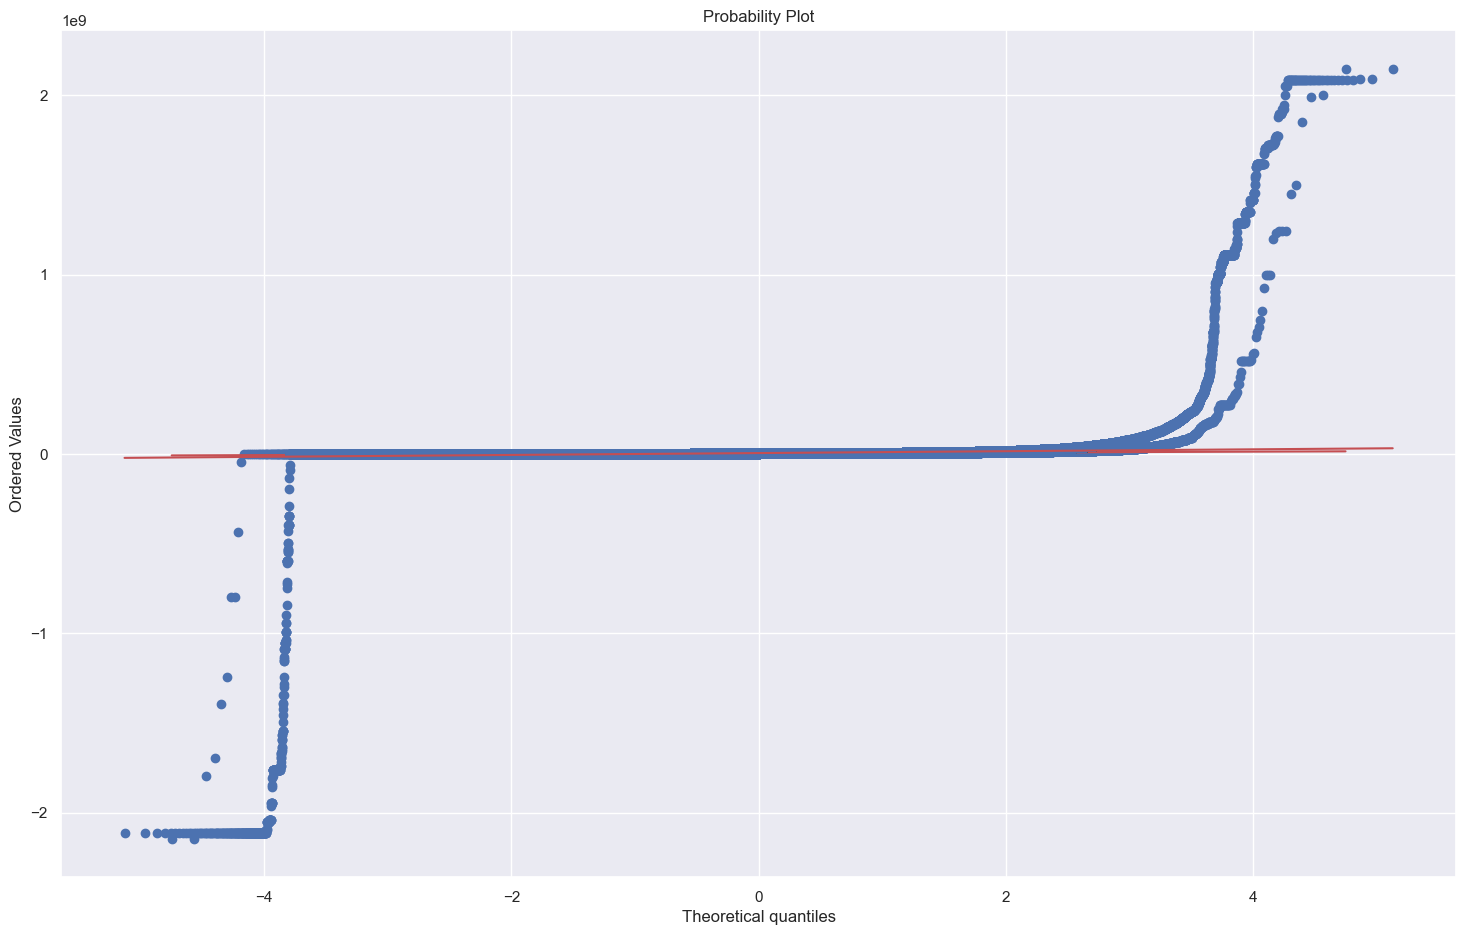

In [84]:
# проверим первую гипотезу. Для этого нам нужно проверить распределение цены квартир на 1 и остальных этажах на нормальность и выбрать тест
level_1 = df_new[df_new['level'] == 1]['price']
level_other = df_new[df_new['level'] != 1]['price']
st.probplot(level_1, dist='norm', plot=plt)
st.probplot(level_other, dist='norm', plot=plt)
plt.

Оба распределения не нормальны, имеют хвосты

In [86]:
alpha = 0.05

results = st.mannwhitneyu(level_1, level_other)

print('p-value', results.pvalue)

if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу.  Cредняя цена на первом этаже и на других этажах разные.')
else:
    print('Нет оснований отклонить нулевую гипотезу. Cредняя цена на первом этаже равна цене на других этажах')

p-value 0.0
Отклоняем нулевую гипотезу.  Cредняя цена на первом этаже и на других этажах разные.


Мы получили, что цены отичаются, но в какую сторону?

In [87]:
alpha = 0.05

results = st.mannwhitneyu(level_1, level_other)

print('p-value', results.pvalue / 2)

if results.pvalue / 2 < alpha and level_1.mean() < level_other.mean():
    print('Отклоняем нулевую гипотезу. Cредняя цена на первом этаже ниже, чем цена на других этажах')
else:
    print('Нет оснований отклонить нулевую гипотезу. Cредняя цена на первом этаже и на других этажах одинакова.')

p-value 0.0
Отклоняем нулевую гипотезу. Cредняя цена на первом этаже ниже, чем цена на других этажах


Теперь перейдем к последнему этажу

In [107]:
# Создание нового столбца, указывающего является ли этаж последним
df_new['last'] = df_new['level'] == df_new['levels']

# Выборка цен на квартиры только на последнем этаже
last_floor_prices = df_new[df_new['last'] == True]['price']
# Выборка цен на квартиры не на последнем этаже
floor_prices = df_new[df_new['last'] == False]['price']

In [108]:
alpha = 0.05

results = st.mannwhitneyu(last_floor_prices, floor_prices)

print('p-value', results.pvalue)

if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу. Cредняя цена на последнем этаже отличается от цен на других этажах')
else:
    print('Нет оснований отклонить нулевую гипотезу. Cредняя цена на последнем этаже и на других этажах одинакова.')

p-value 0.0
Отклоняем нулевую гипотезу. Cредняя цена на последнем этаже отличается от цен на других этажах


In [109]:
alpha = 0.05

results = st.mannwhitneyu(last_floor_prices, floor_prices)

print('p-value', results.pvalue / 2)

if results.pvalue / 2 < alpha and last_floor_prices.mean() < floor_prices.mean():
    print('Отклоняем нулевую гипотезу. Cредняя цена на последнем этаже ниже, чем цена на других этажах')
else:
    print('Нет оснований отклонить нулевую гипотезу. Cредняя цена на последнем этаже и на других этажах одинакова.')

p-value 0.0
Отклоняем нулевую гипотезу. Cредняя цена на последнем этаже ниже, чем цена на других этажах


Вот такие пироги<br>
Теперь обратимся к рынку

In [112]:
first = df_new[df_new['object_type'] == 0]['price']
second = df_new[df_new['object_type'] == 1]['price']
alpha = 0.05

results = st.mannwhitneyu(first, second)

print('p-value', results.pvalue)

if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу. Cредняя цена на первичном и вторичном рынке отличается')
else:
    print('Нет оснований отклонить нулевую гипотезу. Cредняя цена на первичном и вторичном рынке одинакова.')

p-value 0.0
Отклоняем нулевую гипотезу. Cредняя цена на первичном и вторичном рынке отличается


In [114]:
alpha = 0.05

results = st.mannwhitneyu(first, second)

print('p-value', results.pvalue / 2)

if results.pvalue / 2 < alpha and first.mean() > second.mean():
    print('Отклоняем нулевую гипотезу. Cредняя цена на первичном рынке больше средней цены на вторичном рынке')
else:
    print('Нет оснований отклонить нулевую гипотезу. Cредняя цена на первичном и вторичном рынке одинакова.')

p-value 0.0
Отклоняем нулевую гипотезу. Cредняя цена на первичном рынке больше средней цене на вторичном рынке


### Когда осуществлять покупку/продажу

In [116]:
df_new['month'] = df_new['date'].dt.month
df_new

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,reg_name,price_met,последний этаж,last,month
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2018,Санкт-Петербург,73244.552058,False,False,2
1,3600000,2018-03-04,2661,1,2,5,1,31.1,6.0,1,2018,Санкт-Петербург,115755.627010,False,False,3
2,3200000,2018-04-10,2661,1,7,9,1,31.0,7.0,1,2018,Санкт-Петербург,103225.806452,False,False,4
3,6500000,2018-04-23,2661,3,3,3,3,89.0,10.0,1,2018,Санкт-Петербург,73033.707865,True,True,4
4,6300000,2018-04-28,2661,3,5,5,2,99.9,14.5,1,2018,Санкт-Петербург,63063.063063,True,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476997,3000000,2018-11-29,61888,5,2,2,2,57.0,10.0,1,2018,Ненецкий автономный округ,52631.578947,True,True,11
5476998,1400000,2018-11-29,61888,3,3,3,1,18.6,4.0,1,2018,Ненецкий автономный округ,75268.817204,True,True,11
5476999,6000000,2018-11-30,61888,3,5,5,2,64.3,16.3,1,2018,Ненецкий автономный округ,93312.597201,True,True,11
5477000,3500000,2018-11-30,61888,2,1,3,2,59.7,10.2,1,2018,Ненецкий автономный округ,58626.465662,False,False,11


In [118]:
table = df_new.groupby(['object_type' ,'month'])['price'].median()
table

object_type  month
0            1        2933140.0
             2        3050000.0
             3        3400000.0
             4        3400000.0
             5        2600000.0
             6        2696000.0
             7        3050000.0
             8        2740000.0
             9        2797200.0
             10       3001128.0
             11       3221000.0
             12       3752240.0
1            1        2950000.0
             2        3000000.0
             3        3100000.0
             4        3200000.0
             5        2860000.0
             6        2850000.0
             7        2850000.0
             8        2880000.0
             9        2900000.0
             10       2900000.0
             11       2900000.0
             12       2800000.0
Name: price, dtype: float64

Как видно из таблице, если рассматривать первичный рынок, то квартиру выгодно покупать в августе, а продавать в декабре.<br>
Если рассматривать вторичный рынок, то покупать лучше в , а продавать в июне или июле, а продавать в апреле

### Прогнозное значение

In [123]:
x = df_new[['region', 'level', 'levels', 'rooms', 'area']]
y = df_new['price']

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13) 

In [125]:
scaler = StandardScaler()
scaler.fit(x) 

x_train_st = scaler.fit_transform(x_train)
x_test_st = scaler.transform(x_test)

In [126]:
model = Lasso()

# обучим нашу модель
model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)


prediction = model.predict(x_test_st)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_score(y_test, prediction)

[-1371408.85522044    85656.12033491   763555.25953103   355910.62751131
  2349516.71048328] 4422142.94643647


0.021627927785899614

C:\Users\Nastia\AppData\Local\Temp\ipykernel_14872\3817328174.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')


Text(0.5, 1.0, 'Предсказанные значения vs. Фактические значения')

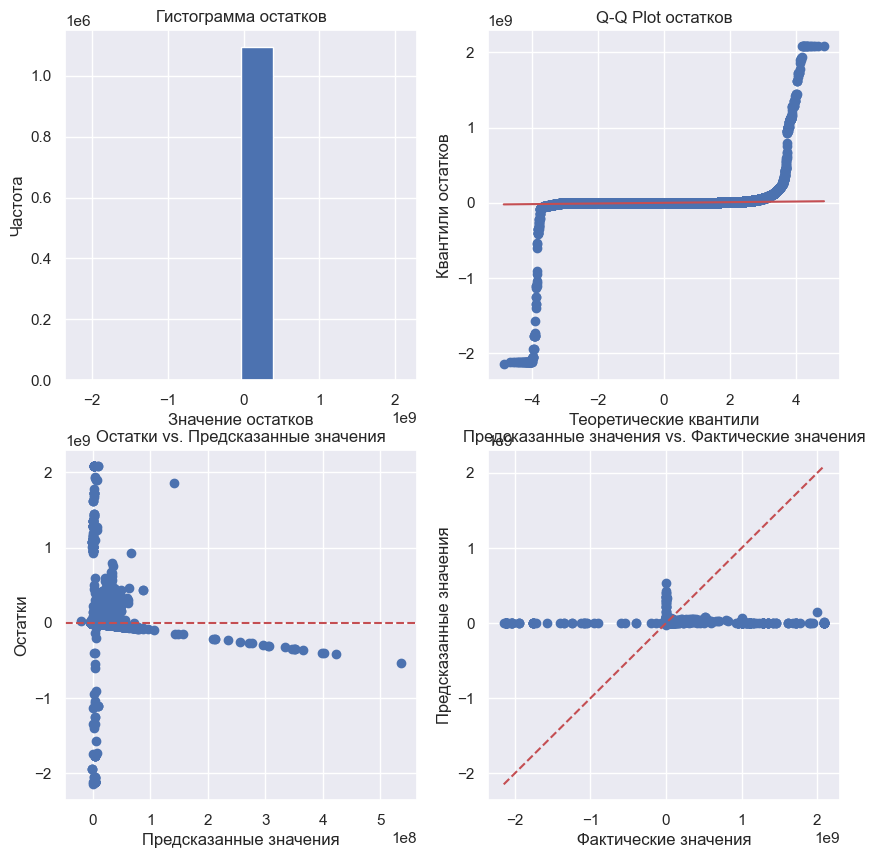

In [127]:
import statsmodels.api as sm

# Получение остатков модели
residuals = y_test - prediction

# Расчет стандартизированных остатков
stand_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
plt.subplots(figsize=(10, 10))


# Распределение остатков
plt.subplot(2, 2, 1)
plt.hist(residuals)
plt.xlabel('Значение остатков')
plt.ylabel('Частота')
plt.title('Гистограмма остатков')
plt.grid(True)


# График остатков vs. предсказанных значений
plt.subplot(2, 2, 2)
st.probplot(residuals, dist='norm', plot=plt)
plt.xlabel('Теоретические квантили')
plt.ylabel('Квантили остатков')
plt.title('Q-Q Plot остатков')
plt.grid(True)

#График остатков относительно прогноза
plt.subplot(2, 2, 3)
plt.scatter(prediction, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs. Предсказанные значения')

# Предсказанные и фактические значения
plt.subplot(2, 2, 4)
plt.scatter(y_test, prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные значения vs. Фактические значения')

По-моему получилось что-то не очень похожее на правду